In [1]:
####
## Celso Antonio Uliana Junior
## July 2 2020
####

import pandas as pd

#####
## Consuming and shaping the data to analysis
## Covid-19 numbers in Brazil by date
## Isolation percentage in Brazil by date
#####

data_raw_covid = pd.read_csv("C:/Users/PCDOMILHAO/Documents/GitHub/trab-siad/scripts/Jupyter-Notebook/dados/covidBrasil.csv", sep = ";", decimal = ",")
data_covid = data_raw_covid['Data'].values.copy()
data_covid = data_raw_covid.dropna().set_index("Data")

####
## Shaping a central pandas dataFrame for all our ML needs
####

data = data_covid

In [2]:
from sklearn.preprocessing import MinMaxScaler

####
## normalizing values for both covid and isolation percentage 
## between range [0,1] using sklearn MinMaxScaler
####

covid_norm = data_covid["Casos"].values.copy()
covid_norm.shape = (len(covid_norm), 1)

####
## Shaping the central dataFrame with normalized values
####
min_max_scaler = MinMaxScaler()

covid_norm = min_max_scaler.fit_transform(covid_norm)

data["CasosNormalizados"] = covid_norm
data.head(200)

,Casos,CasosNormalizados
Data,,
26/2/20,1,0.000018
27/2/20,0,0.000000
28/2/20,0,0.000000
29/2/20,0,0.000000
1/3/20,1,0.000018
...,...,...
17/6/20,34918,0.637527
18/6/20,32188,0.587683
19/6/20,22765,0.415640


In [3]:
####
## Sliding window
####
df = pd.DataFrame()
window_size = 6
for i in range(0, window_size + 1):
    df['E{}'.format(i)] = data['CasosNormalizados'].shift(-i)
df = df.iloc[: -window_size]
print(df)

               E0        E1        E2        E3        E4        E5        E6
Data                                                                         
26/2/20  0.000018  0.000000  0.000000  0.000000  0.000018  0.000000  0.000000
27/2/20  0.000000  0.000000  0.000000  0.000018  0.000000  0.000000  0.000000
28/2/20  0.000000  0.000000  0.000018  0.000000  0.000000  0.000000  0.000018
29/2/20  0.000000  0.000018  0.000000  0.000000  0.000000  0.000018  0.000091
1/3/20   0.000018  0.000000  0.000000  0.000000  0.000018  0.000091  0.000091
...           ...       ...       ...       ...       ...       ...       ...
11/6/20  0.600920  0.555257  0.474375  0.396268  0.312392  0.376970  0.637527
12/6/20  0.555257  0.474375  0.396268  0.312392  0.376970  0.637527  0.587683
13/6/20  0.474375  0.396268  0.312392  0.376970  0.637527  0.587683  0.415640
14/6/20  0.396268  0.312392  0.376970  0.637527  0.587683  0.415640  1.000000
15/6/20  0.312392  0.376970  0.637527  0.587683  0.415640  1.000

In [4]:
####
## Manipulating the data to split into X(a window size of values)
## and target, or Y, the value X "produces"
####

arr = df.values

X = arr[:, : -1]
target = arr[:, -1]
print(X)
print(target)

[[1.82578372e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.82578372e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.82578372e-05
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.82578372e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.82578372e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.82578372e-05]
 [1.82578372e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.82578372e-05 9.12891859e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.82578372e-05
  9.12891859e-05 9.12891859e-05]
 [0.00000000e+00 0.00000000e+00 1.82578372e-05 9.12891859e-05
  9.12891859e-05 0.00000000e+00]
 [0.00000000e+00 1.82578372e-05 9.12891859e-05 9.12891859e-05
  0.00000000e+00 2.19094046e-04]
 [1.82578372e-05 9.12891859e-05 9.12891859e-05 0.00000000e+00
  2.19094046e-04 0.00000000e+00]
 [9.12891859e-05 9.12891859e-05 0.00000000e+00 2.19094046e-04
  0.00000000e+00 1.64320535e-04]
 [9.12891859e-05 0.00000000e+00 2.19094046e-04 0.0

In [5]:
####
## Config of the regressors and cross val leave one out
####
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()


mlp = MLPRegressor(
    hidden_layer_sizes = (50,), alpha = 0.001,
    learning_rate_init = 0.01, max_iter = 1000,
    random_state = 9, tol = 0.0001, verbose = True)
svr = SVR(kernel = 'linear', C = 0.25, epsilon = 0.01, verbose = True, max_iter = 1000)
lr = LinearRegression()

full_predict_lr = cross_val_predict(lr, X, target, cv = loo)
full_predict_mlp = cross_val_predict(mlp, X, target, cv = loo)
full_predict_svr = cross_val_predict(svr, X, target, cv = loo)

Iteration 1, loss = 0.02272646
Iteration 2, loss = 0.00601602
Iteration 3, loss = 0.01036731
Iteration 4, loss = 0.01263170
Iteration 5, loss = 0.00856519
Iteration 6, loss = 0.00440394
Iteration 7, loss = 0.00370121
Iteration 8, loss = 0.00564778
Iteration 9, loss = 0.00721086
Iteration 10, loss = 0.00679693
Iteration 11, loss = 0.00515472
Iteration 12, loss = 0.00383529
Iteration 13, loss = 0.00373159
Iteration 14, loss = 0.00454160
Iteration 15, loss = 0.00521450
Iteration 16, loss = 0.00502877
Iteration 17, loss = 0.00418000
Iteration 18, loss = 0.00336404
Iteration 19, loss = 0.00311406
Iteration 20, loss = 0.00342386
Iteration 21, loss = 0.00385686
Iteration 22, loss = 0.00398880
Iteration 23, loss = 0.00373419
Iteration 24, loss = 0.00333676
Iteration 25, loss = 0.00310877
Iteration 26, loss = 0.00316901
Iteration 27, loss = 0.00338544
Iteration 28, loss = 0.00351597
Iteration 29, loss = 0.00342285
Iteration 30, loss = 0.00317917
Training loss did not improve more than tol=0.000

Iteration 27, loss = 0.00338547
Iteration 28, loss = 0.00351598
Iteration 29, loss = 0.00342283
Iteration 30, loss = 0.00317915
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02272642
Iteration 2, loss = 0.00601642
Iteration 3, loss = 0.01036757
Iteration 4, loss = 0.01263158
Iteration 5, loss = 0.00856500
Iteration 6, loss = 0.00440389
Iteration 7, loss = 0.00370131
Iteration 8, loss = 0.00564792
Iteration 9, loss = 0.00721090
Iteration 10, loss = 0.00679686
Iteration 11, loss = 0.00515466
Iteration 12, loss = 0.00383533
Iteration 13, loss = 0.00373174
Iteration 14, loss = 0.00454178
Iteration 15, loss = 0.00521457
Iteration 16, loss = 0.00502872
Iteration 17, loss = 0.00417991
Iteration 18, loss = 0.00336400
Iteration 19, loss = 0.00311409
Iteration 20, loss = 0.00342394
Iteration 21, loss = 0.00385691
Iteration 22, loss = 0.00398880
Iteration 23, loss = 0.00373416
Iteration 24, loss = 0.00333673
Iteration 25, loss = 0.

Iteration 2, loss = 0.00602176
Iteration 3, loss = 0.01037080
Iteration 4, loss = 0.01262946
Iteration 5, loss = 0.00856214
Iteration 6, loss = 0.00440300
Iteration 7, loss = 0.00370260
Iteration 8, loss = 0.00564965
Iteration 9, loss = 0.00721127
Iteration 10, loss = 0.00679588
Iteration 11, loss = 0.00515383
Iteration 12, loss = 0.00383591
Iteration 13, loss = 0.00373369
Iteration 14, loss = 0.00454401
Iteration 15, loss = 0.00521537
Iteration 16, loss = 0.00502783
Iteration 17, loss = 0.00417850
Iteration 18, loss = 0.00336320
Iteration 19, loss = 0.00311446
Iteration 20, loss = 0.00342490
Iteration 21, loss = 0.00385754
Iteration 22, loss = 0.00398862
Iteration 23, loss = 0.00373347
Iteration 24, loss = 0.00333630
Iteration 25, loss = 0.00310920
Iteration 26, loss = 0.00316989
Iteration 27, loss = 0.00338628
Iteration 28, loss = 0.00351612
Iteration 29, loss = 0.00342228
Iteration 30, loss = 0.00317845
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. 

Iteration 14, loss = 0.00454620
Iteration 15, loss = 0.00521551
Iteration 16, loss = 0.00502576
Iteration 17, loss = 0.00417588
Iteration 18, loss = 0.00336149
Iteration 19, loss = 0.00311429
Iteration 20, loss = 0.00342549
Iteration 21, loss = 0.00385775
Iteration 22, loss = 0.00398788
Iteration 23, loss = 0.00373221
Iteration 24, loss = 0.00333552
Iteration 25, loss = 0.00310945
Iteration 26, loss = 0.00317065
Iteration 27, loss = 0.00338689
Iteration 28, loss = 0.00351596
Iteration 29, loss = 0.00342136
Iteration 30, loss = 0.00317738
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02272315
Iteration 2, loss = 0.00602876
Iteration 3, loss = 0.01037326
Iteration 4, loss = 0.01262377
Iteration 5, loss = 0.00855727
Iteration 6, loss = 0.00440104
Iteration 7, loss = 0.00370319
Iteration 8, loss = 0.00565067
Iteration 9, loss = 0.00721079
Iteration 10, loss = 0.00679405
Iteration 11, loss = 0.00515230
Iteration 12, loss = 0.

Iteration 21, loss = 0.00385490
Iteration 22, loss = 0.00398680
Iteration 23, loss = 0.00373269
Iteration 24, loss = 0.00333629
Iteration 25, loss = 0.00310918
Iteration 26, loss = 0.00316874
Iteration 27, loss = 0.00338429
Iteration 28, loss = 0.00351387
Iteration 29, loss = 0.00342019
Iteration 30, loss = 0.00317659
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02272057
Iteration 2, loss = 0.00603111
Iteration 3, loss = 0.01036806
Iteration 4, loss = 0.01261870
Iteration 5, loss = 0.00855502
Iteration 6, loss = 0.00440042
Iteration 7, loss = 0.00370195
Iteration 8, loss = 0.00564880
Iteration 9, loss = 0.00720982
Iteration 10, loss = 0.00679453
Iteration 11, loss = 0.00515376
Iteration 12, loss = 0.00383773
Iteration 13, loss = 0.00373586
Iteration 14, loss = 0.00454499
Iteration 15, loss = 0.00521339
Iteration 16, loss = 0.00502382
Iteration 17, loss = 0.00417479
Iteration 18, loss = 0.00336065
Iteration 19, loss = 0.

Iteration 14, loss = 0.00454814
Iteration 15, loss = 0.00521387
Iteration 16, loss = 0.00502150
Iteration 17, loss = 0.00417174
Iteration 18, loss = 0.00335858
Iteration 19, loss = 0.00311307
Iteration 20, loss = 0.00342475
Iteration 21, loss = 0.00385678
Iteration 22, loss = 0.00398684
Iteration 23, loss = 0.00373182
Iteration 24, loss = 0.00333602
Iteration 25, loss = 0.00311084
Iteration 26, loss = 0.00317141
Iteration 27, loss = 0.00338640
Iteration 28, loss = 0.00351430
Iteration 29, loss = 0.00341890
Iteration 30, loss = 0.00317488
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02270344
Iteration 2, loss = 0.00604481
Iteration 3, loss = 0.01037375
Iteration 4, loss = 0.01260075
Iteration 5, loss = 0.00853468
Iteration 6, loss = 0.00439082
Iteration 7, loss = 0.00370422
Iteration 8, loss = 0.00565376
Iteration 9, loss = 0.00720826
Iteration 10, loss = 0.00678676
Iteration 11, loss = 0.00514687
Iteration 12, loss = 0.

Iteration 3, loss = 0.01034949
Iteration 4, loss = 0.01258330
Iteration 5, loss = 0.00853361
Iteration 6, loss = 0.00439171
Iteration 7, loss = 0.00369604
Iteration 8, loss = 0.00564001
Iteration 9, loss = 0.00720050
Iteration 10, loss = 0.00679050
Iteration 11, loss = 0.00515685
Iteration 12, loss = 0.00384184
Iteration 13, loss = 0.00373556
Iteration 14, loss = 0.00453944
Iteration 15, loss = 0.00520264
Iteration 16, loss = 0.00501162
Iteration 17, loss = 0.00416457
Iteration 18, loss = 0.00335372
Iteration 19, loss = 0.00310432
Iteration 20, loss = 0.00341025
Iteration 21, loss = 0.00384107
Iteration 22, loss = 0.00397344
Iteration 23, loss = 0.00372340
Iteration 24, loss = 0.00333213
Iteration 25, loss = 0.00310565
Iteration 26, loss = 0.00316083
Iteration 27, loss = 0.00337554
Iteration 28, loss = 0.00350410
Iteration 29, loss = 0.00340870
Iteration 30, loss = 0.00316331
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0

Iteration 26, loss = 0.00316866
Iteration 27, loss = 0.00338364
Iteration 28, loss = 0.00350795
Iteration 29, loss = 0.00340765
Iteration 30, loss = 0.00316060
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02255969
Iteration 2, loss = 0.00604774
Iteration 3, loss = 0.01035454
Iteration 4, loss = 0.01250455
Iteration 5, loss = 0.00844352
Iteration 6, loss = 0.00434972
Iteration 7, loss = 0.00371024
Iteration 8, loss = 0.00566842
Iteration 9, loss = 0.00719728
Iteration 10, loss = 0.00675218
Iteration 11, loss = 0.00511554
Iteration 12, loss = 0.00383130
Iteration 13, loss = 0.00375954
Iteration 14, loss = 0.00456915
Iteration 15, loss = 0.00520547
Iteration 16, loss = 0.00498174
Iteration 17, loss = 0.00412473
Iteration 18, loss = 0.00333032
Iteration 19, loss = 0.00311253
Iteration 20, loss = 0.00343980
Iteration 21, loss = 0.00386738
Iteration 22, loss = 0.00398121
Iteration 23, loss = 0.00371578
Iteration 24, loss = 0.

Iteration 16, loss = 0.00495443
Iteration 17, loss = 0.00409852
Iteration 18, loss = 0.00331789
Iteration 19, loss = 0.00311005
Iteration 20, loss = 0.00343679
Iteration 21, loss = 0.00385723
Iteration 22, loss = 0.00396483
Iteration 23, loss = 0.00369943
Iteration 24, loss = 0.00331467
Iteration 25, loss = 0.00310735
Iteration 26, loss = 0.00317931
Iteration 27, loss = 0.00339218
Iteration 28, loss = 0.00350249
Iteration 29, loss = 0.00338914
Iteration 30, loss = 0.00314063
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02247422
Iteration 2, loss = 0.00605072
Iteration 3, loss = 0.01031098
Iteration 4, loss = 0.01245807
Iteration 5, loss = 0.00842612
Iteration 6, loss = 0.00435082
Iteration 7, loss = 0.00369879
Iteration 8, loss = 0.00563584
Iteration 9, loss = 0.00716285
Iteration 10, loss = 0.00673310
Iteration 11, loss = 0.00511176
Iteration 12, loss = 0.00382723
Iteration 13, loss = 0.00374119
Iteration 14, loss = 0.

Iteration 26, loss = 0.00313435
Iteration 27, loss = 0.00334049
Iteration 28, loss = 0.00343047
Iteration 29, loss = 0.00330101
Iteration 30, loss = 0.00305231
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02183182
Iteration 2, loss = 0.00588222
Iteration 3, loss = 0.01026024
Iteration 4, loss = 0.01217814
Iteration 5, loss = 0.00810994
Iteration 6, loss = 0.00419284
Iteration 7, loss = 0.00372986
Iteration 8, loss = 0.00570821
Iteration 9, loss = 0.00711664
Iteration 10, loss = 0.00656561
Iteration 11, loss = 0.00493598
Iteration 12, loss = 0.00374289
Iteration 13, loss = 0.00376216
Iteration 14, loss = 0.00458619
Iteration 15, loss = 0.00515531
Iteration 16, loss = 0.00485675
Iteration 17, loss = 0.00398682
Iteration 18, loss = 0.00324660
Iteration 19, loss = 0.00310231
Iteration 20, loss = 0.00346480
Iteration 21, loss = 0.00386794
Iteration 22, loss = 0.00392932
Iteration 23, loss = 0.00363242
Iteration 24, loss = 0.

Iteration 14, loss = 0.00451089
Iteration 15, loss = 0.00514683
Iteration 16, loss = 0.00494886
Iteration 17, loss = 0.00410742
Iteration 18, loss = 0.00332045
Iteration 19, loss = 0.00309297
Iteration 20, loss = 0.00340172
Iteration 21, loss = 0.00382208
Iteration 22, loss = 0.00394861
Iteration 23, loss = 0.00370248
Iteration 24, loss = 0.00331627
Iteration 25, loss = 0.00309534
Iteration 26, loss = 0.00316033
Iteration 27, loss = 0.00336698
Iteration 28, loss = 0.00348761
Iteration 29, loss = 0.00339002
Iteration 30, loss = 0.00314905
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.02257437
Iteration 2, loss = 0.00602086
Iteration 3, loss = 0.01009639
Iteration 4, loss = 0.01236796
Iteration 5, loss = 0.00843906
Iteration 6, loss = 0.00430399
Iteration 7, loss = 0.00351690
Iteration 8, loss = 0.00540129
Iteration 9, loss = 0.00701019
Iteration 10, loss = 0.00670794
Iteration 11, loss = 0.00513183
Iteration 12, loss = 0.

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [6]:
####
## Printing some metrics of the regressors
####
print('Mean Squared Error in MLP: %s' %(metrics.mean_squared_error(target, full_predict_mlp)))
print('Mean Squared Error in SVR: %s' %(metrics.mean_squared_error(target, full_predict_svr)))
print('Mean Squared Error in LR: %s' %(metrics.mean_squared_error(target, full_predict_lr)))

r_squared_mlp = metrics.r2_score(target, full_predict_mlp)
r_squared_svr = metrics.r2_score(target, full_predict_svr)
r_squared_lr = metrics.r2_score(target, full_predict_lr)

print('R² score in MLP: %s' %(r_squared_mlp))
print('R² score in SVR: %s' %(r_squared_svr))
print('R² score in LR: %s' %(r_squared_lr))

adjusted_r_squared_mlp = 1 - (1 - r_squared_mlp) * (len(target) - 1) / (len(target) - X.shape[1] - 1)
adjusted_r_squared_svr = 1 - (1 - r_squared_svr) * (len(target) - 1) / (len(target) - X.shape[1] - 1)
adjusted_r_squared_lr = 1 - (1 - r_squared_lr) * (len(target) - 1) / (len(target) - X.shape[1] - 1)

print('adjusted R² score in MLP: %s' %(adjusted_r_squared_mlp))
print('adjusted R² score in SVR: %s' %(adjusted_r_squared_svr))
print('adjusted R² score in LR: %s' %(adjusted_r_squared_lr))

Mean Squared Error in MLP: 0.007172284489446285
Mean Squared Error in SVR: 0.006799635526165946
Mean Squared Error in LR: 0.007608342850615478
R² score in MLP: 0.8335484222014908
R² score in SVR: 0.8421967138293902
R² score in LR: 0.823428550027479
adjusted R² score in MLP: 0.8239454465592692
adjusted R² score in SVR: 0.8330926780887782
adjusted R² score in LR: 0.8132417356059873


In [7]:
####
## Filling lists with NaN so the len is the same across all lists 
## so that a graph can be generated
####
import numpy as np

values_to_add = list()
for i in range(0, window_size):
    values_to_add.append(float('NaN'))
    
full_predict_svr = np.insert(full_predict_svr, 0, values_to_add)
full_predict_svr.shape = (len(full_predict_svr), 1)
    
full_predict_mlp = np.insert(full_predict_mlp, 0, values_to_add)
full_predict_mlp.shape = (len(full_predict_mlp), 1)

full_predict_lr = np.insert(full_predict_lr, 0, values_to_add)
full_predict_lr.shape = (len(full_predict_lr), 1)

print(full_predict_svr.shape)
print(full_predict_mlp.shape)
print(full_predict_lr.shape)

(117, 1)
(117, 1)
(117, 1)


In [8]:
####
## Adding the data to plot 
####
data['Predict_lr'] = full_predict_lr
data['Predict_mlp'] = full_predict_mlp
data['Predict_svr'] = full_predict_svr
data

,Casos,CasosNormalizados,Predict_lr,Predict_mlp,Predict_svr
Data,,,,,
26/2/20,1,0.000018,NaN,NaN,NaN
27/2/20,0,0.000000,NaN,NaN,NaN
28/2/20,0,0.000000,NaN,NaN,NaN
29/2/20,0,0.000000,NaN,NaN,NaN
1/3/20,1,0.000018,NaN,NaN,NaN
...,...,...,...,...,...
17/6/20,34918,0.637527,0.535564,0.512767,0.508200
18/6/20,32188,0.587683,0.613958,0.571534,0.588058
19/6/20,22765,0.415640,0.562513,0.546907,0.539008


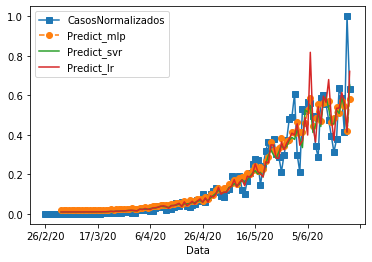

In [9]:
import matplotlib.pyplot as plt
data.plot(y=['CasosNormalizados', 'Predict_mlp', 'Predict_svr', 'Predict_lr'], style=['-s', '--o'])
plt.show()